## Classification

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
Y = iris.target

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [2]:
import pandas as pd
import numpy as np

data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [3]:
def species(label) :
    if label == 0.0 :
        return 'sentosa'
    elif label == 1.0 :
        return 'versicolor'
    elif label == 2.0 :
        return 'virginica'
    
data['species'] = data['target'].apply(species) 

data['species'].value_counts()

sentosa       50
versicolor    50
virginica     50
Name: species, dtype: int64

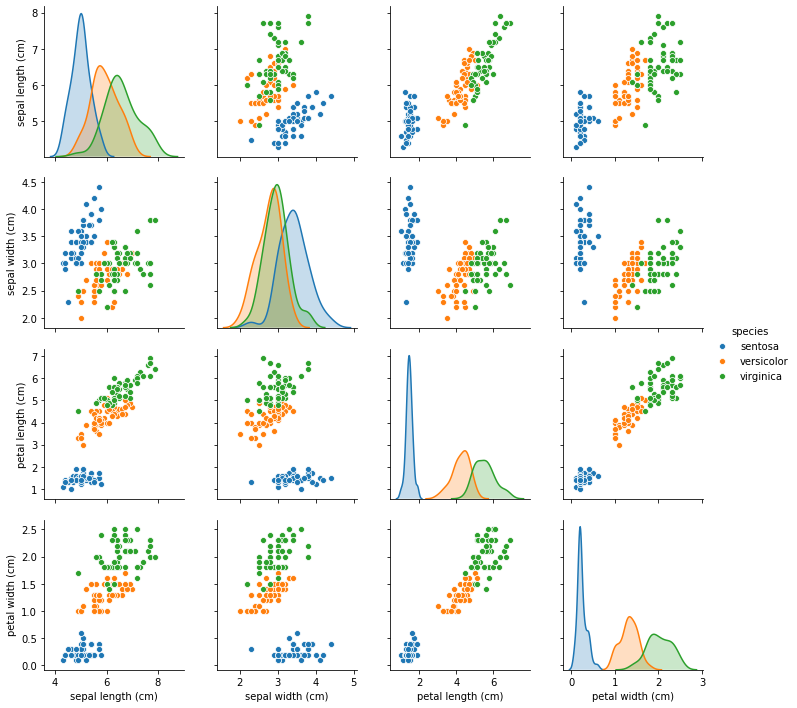

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt       

tmp = data.drop('target', axis=1)
g = sns.pairplot(tmp, hue='species')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [5]:
from sklearn import svm

clf = svm.SVC()
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [6]:
predict = clf.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,predict)

0.9555555555555556

In [7]:
print(y_test)
print('\n')
print(predict)

[2 0 0 2 2 0 0 2 2 2 0 1 1 1 2 2 1 1 1 2 0 2 0 2 2 2 0 2 2 2 0 1 1 0 2 1 1
 2 0 1 0 1 1 0 0]


[2 0 0 1 2 0 0 2 2 2 0 1 1 1 2 2 1 1 1 1 0 2 0 2 2 2 0 2 2 2 0 1 1 0 2 1 1
 2 0 1 0 1 1 0 0]


# Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

clf_lr = LinearRegression()
clf_lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

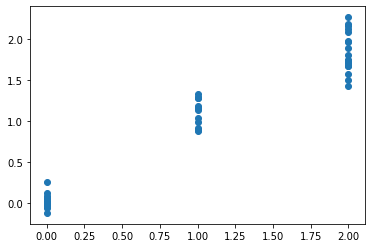

In [11]:
predictions = clf_lr.predict(x_test)
plt.scatter(y_test,predictions)

In [12]:
predict_linear = abs(predictions.round())
print(y_test)
print('\n')
print(predict_linear)

[2 0 0 2 2 0 0 2 2 2 0 1 1 1 2 2 1 1 1 2 0 2 0 2 2 2 0 2 2 2 0 1 1 0 2 1 1
 2 0 1 0 1 1 0 0]


[2. 0. 0. 1. 2. 0. 0. 2. 2. 2. 0. 1. 1. 1. 2. 2. 1. 1. 1. 2. 0. 2. 0. 2.
 2. 2. 0. 2. 2. 2. 0. 1. 1. 0. 2. 1. 1. 2. 0. 1. 0. 1. 1. 0. 0.]


In [13]:
accuracy_score(y_test,predict_linear)

0.9777777777777777

# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
predic_log = clf_log.predict(x_test)
predic_log

array([2, 0, 0, 1, 2, 0, 0, 2, 2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 1, 0,
       0])

In [16]:
accuracy_score(y_test,predic_log)

0.9777777777777777

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predic_log)

array([[14,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 17]])

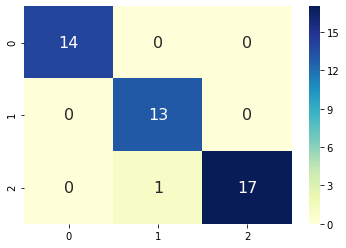

In [18]:
df_cm = pd.DataFrame(confusion_matrix(y_test, predic_log), range(3), range(3))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},cmap="YlGnBu")

plt.show()

# K Nearest Neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [20]:
knn_pred = knn.predict(x_test)
knn_pred

array([2, 0, 0, 1, 2, 0, 0, 2, 2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 1, 0,
       0])

In [21]:
accuracy_score(y_test,knn_pred)

0.9777777777777777

In [22]:
confusion_matrix(y_test, knn_pred)

array([[14,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 17]])

In [23]:
error_rate = []

for i in range(1,15):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

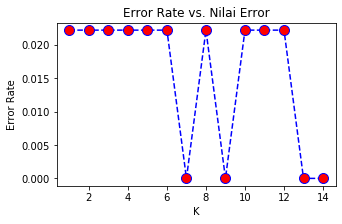

In [24]:
plt.figure(figsize=(5,3))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. Nilai Error')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [39]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [40]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [41]:
new_x_train,new_x_test,new_y_train,new_y_test=train_test_split(data.data,data.target,test_size=0.3)

In [42]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(new_x_train,new_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [43]:
knn_pred = knn.predict(new_x_test)
knn_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [44]:
accuracy_score(new_y_test,knn_pred)

0.9064327485380117

In [45]:
confusion_matrix(new_y_test, knn_pred)

array([[57,  6],
       [10, 98]])

In [46]:
error_rate_new = []

for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(new_x_train,new_y_train)
    pred_i = knn.predict(new_x_test)
    error_rate_new.append(np.mean(pred_i != new_y_test))

Text(0, 0.5, 'Error Rate')

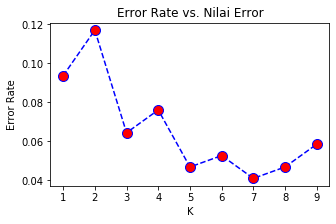

In [49]:
plt.figure(figsize=(5,3))
plt.plot(range(1,10),error_rate_new,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. Nilai Error')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [50]:
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(new_x_train,new_y_train)
pred = knn.predict(new_x_test)

print('dengan K=1')
print('\n')
print(confusion_matrix(new_y_test,pred))
print('\n')
print(classification_report(new_y_test,pred))
print('\n')

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(new_x_train,new_y_train)
pred = knn.predict(new_x_test)

print('dengan K=9')
print('\n')
print(confusion_matrix(new_y_test,pred))
print(classification_report(new_y_test,pred))
print('\n')

dengan K=1


[[57  6]
 [10 98]]


              precision    recall  f1-score   support

           0       0.85      0.90      0.88        63
           1       0.94      0.91      0.92       108

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.90       171
weighted avg       0.91      0.91      0.91       171



dengan K=9


[[ 58   5]
 [  2 106]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.95      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171





# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(new_x_train,new_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
tree_pred = dtree.predict(new_x_test)

In [37]:
print(confusion_matrix(new_y_test,tree_pred))
print(classification_report(new_y_test,tree_pred))

[[60  8]
 [13 90]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        68
           1       0.92      0.87      0.90       103

    accuracy                           0.88       171
   macro avg       0.87      0.88      0.87       171
weighted avg       0.88      0.88      0.88       171



# Decision Tree Visulization

/home/not/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


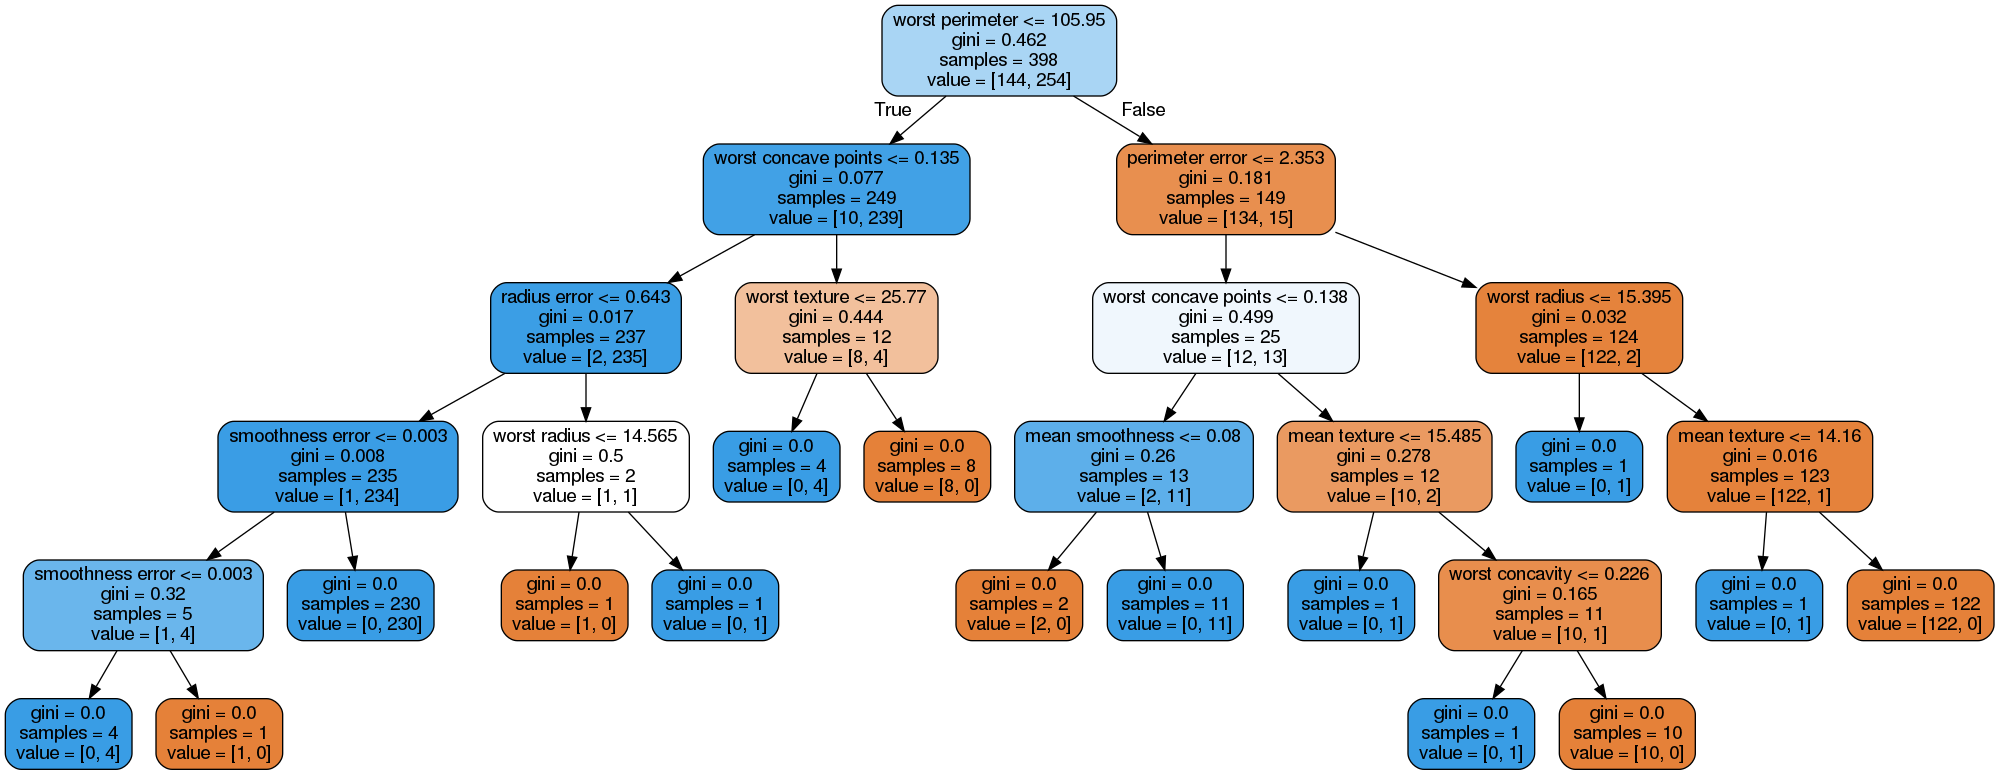

In [38]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot

dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=data.feature_names,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 